<a href="https://colab.research.google.com/github/sauravsingla/NLP/blob/master/NLP_Text_Document_Similarity_Genism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_table('restaurant-test.csv',
                    nrows= 1000,
                    sep=r'/,,,,,,+/',
                    names = ['review'],
                    header = None,
                    engine = 'python')
print(df.review[0])
df.head()

My son just loves this place.  Weird that he'd ask to come here everytime we go grocery shopping (bribe) and not even care to go to Toys R Us.  Not complaining.   I'm not into little knick knacks, but they have quite a selection on little travel toys, educational materials for kids and holiday stuff.  I bought a couple of red bows with brass jingles on it and wreaths to put on my porch lights for $4!   Why is it that it's so cheap, but you can end up spending $50?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


,review
0,My son just loves this place. Weird that he'd...
1,"""We gave it a 9, so we will make that 5-, 4,5 ..."
2,After three lunch visits I've come to the conc...
3,"""What started out as a simple attempt to find ..."
4,"If they had a Culver's on every street corner,..."


In [ ]:
#import string library to identify punctuation and the translate, maketrans ability
#This eliminates the punctuation

import string

def remove_punctuation(text):
  return text.translate(text.maketrans("", "", string.punctuation))

df['review'] = df['review'].apply(lambda val: remove_punctuation(val))
df.head()

,review
0,My son just loves this place Weird that hed a...
1,We gave it a 9 so we will make that 5 45 stars...
2,After three lunch visits Ive come to the concl...
3,What started out as a simple attempt to find a...
4,If they had a Culvers on every street corner t...


In [ ]:
#impot nltk to tokenize the text, this splits each sentence to individual strings
#that will allow us to later indentify common words and remove them.
import nltk
nltk.download('punkt')

def tokenize_me(sentence):
  tokens = nltk.word_tokenize(sentence)
  return tokens
  
df['review'] = df['review'].apply(lambda val: tokenize_me(val))

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review
0,"[My, son, just, loves, this, place, Weird, tha..."
1,"[We, gave, it, a, 9, so, we, will, make, that,..."
2,"[After, three, lunch, visits, Ive, come, to, t..."
3,"[What, started, out, as, a, simple, attempt, t..."
4,"[If, they, had, a, Culvers, on, every, street,..."


In [ ]:
#Now get rid of stopwords

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


def filter_stop_words(tokens):
  filtered_tokens=[]
  for w in tokens:
    if w not in stop_words:
      filtered_tokens.append(w)
  return filtered_tokens

df['review'] = df['review'].apply(lambda val: filter_stop_words(val))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review
0,"[My, son, loves, place, Weird, hed, ask, come,..."
1,"[We, gave, 9, make, 5, 45, stars, n, To, start..."
2,"[After, three, lunch, visits, Ive, come, concl..."
3,"[What, started, simple, attempt, find, perfect..."
4,"[If, Culvers, every, street, corner, cardiolog..."


In [ ]:
from nltk.stem.snowball import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')

def stem_it(array):
  changed_array = []
  for w in array:
    new_w = snowball_stemmer.stem(w)
    changed_array.append(new_w)
  return changed_array

df_stemmed = df.copy()
df_stemmed['review'] = df_stemmed['review'].apply(lambda val: stem_it(val))

df_stemmed.head()

,review
0,"[my, son, love, place, weird, hed, ask, come, ..."
1,"[we, gave, 9, make, 5, 45, star, n, to, start,..."
2,"[after, three, lunch, visit, ive, come, conclu..."
3,"[what, start, simpl, attempt, find, perfect, b..."
4,"[if, culver, everi, street, corner, cardiologi..."


In [ ]:
#To do this we will need sklearn's Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

#we'll also need to reconnect the tokens into strings and put them into a list
corpus = df_stemmed['review'].apply(lambda val: ' '.join(val))

#we'll restrict the number of max features to 1000
count_vectorizer= CountVectorizer(max_features=1000)

#fit_transform the corpus and make it into an array
counts = count_vectorizer.fit_transform(corpus).toarray()

# change the array into a pandas dataframe
counts_df = pd.DataFrame(counts)

#set the names of the columns to the words, otherwise it'll be numbers
counts_df.columns = count_vectorizer.get_feature_names()

#show matrix
counts_df.head()

,10,100,12,15,20,25,30,35,50,abl,...,yes,yesterday,yet,yogurt,you,youll,young,your,yum,yummi
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we'll use CountVectorizer again but now specify the ngram_range

bigram_vectorizer = CountVectorizer(ngram_range =(2,2), max_features = 1000)
bigram_matrix = bigram_vectorizer.fit_transform(corpus).toarray()

bigram_df = pd.DataFrame(bigram_matrix)
bigram_df.columns = bigram_vectorizer.get_feature_names()

bigram_df.head()

,10 minut,15 minut,20 minut,30 minut,40 minut,45 minut,absolut favorit,absolut love,across street,advanc health,...,write review,year ago,year old,yelp review,you cant,you could,you get,youll find,your go,your look
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Let's set min_df, the cut off point, to 2 so as to not count any terms which
#appear less than twice
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=2)

tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
tfidf_df = pd.DataFrame(tfidf)
tfidf_df.columns = tfidf_vectorizer.get_feature_names()

tfidf_df.head()

,10,100,12,15,20,25,30,35,50,abl,...,yes,yesterday,yet,yogurt,you,youll,young,your,yum,yummi
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.26892,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.154332,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.042587,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.081788,0.0,0.0,0.082947,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
#install gensim
!pip install --upgrade gensim

    100% |████████████████████████████████| 24.2MB 2.0MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import Word2Vec

#take non-stemmed tokens and convert them into a list
#I chose non-stemmed because the stemming process changes
#awesome and loves
sentences = df["review"].tolist()

#set min_count to 1 and size of word vectors to 5
model = Word2Vec(sentences, min_count = 1, size = 5)

print(model)

Word2Vec(vocab=17069, size=5, alpha=0.025)


In [ ]:
model.wv.similar_by_word('awesome')

[('day', 0.9999887943267822),
 ('keep', 0.999929666519165),
 ('even', 0.9999194741249084),
 ('lovely', 0.9999107122421265),
 ('really', 0.9999085664749146),
 ('get', 0.9998980760574341),
 ('love', 0.9998970031738281),
 ('business', 0.9998937249183655),
 ('kids', 0.9998855590820312),
 ('couldnt', 0.9998849034309387)]

In [ ]:
model.wv.similar_by_word('loves')

[('attention', 0.9999452233314514),
 ('locally', 0.9996541738510132),
 ('hold', 0.9995646476745605),
 ('middle', 0.9994264841079712),
 ('platter', 0.9993995428085327),
 ('How', 0.9993345737457275),
 ('short', 0.9993141889572144),
 ('dry', 0.9993124604225159),
 ('wrong', 0.9992944002151489),
 ('passed', 0.9992669224739075)]

In [ ]:
#First convert each review into a tagged document

from gensim.models.doc2vec import TaggedDocument

#Then go through the list of reviews and pass each list of word tokens and the
#index to the TaggedDocument function to create the tagged documents for Doc2Vec
tagged_documents = []
for i, sentence in enumerate(sentences):
  tagged_documents.append(TaggedDocument(sentence,[i]))
  
tagged_documents[:10]

[TaggedDocument(words=['My', 'son', 'loves', 'place', 'Weird', 'hed', 'ask', 'come', 'everytime', 'go', 'grocery', 'shopping', 'bribe', 'even', 'care', 'go', 'Toys', 'R', 'Us', 'Not', 'complaining', 'Im', 'little', 'knick', 'knacks', 'quite', 'selection', 'little', 'travel', 'toys', 'educational', 'materials', 'kids', 'holiday', 'stuff', 'I', 'bought', 'couple', 'red', 'bows', 'brass', 'jingles', 'wreaths', 'put', 'porch', 'lights', '4', 'Why', 'cheap', 'end', 'spending', '50'], tags=[0]),
 TaggedDocument(words=['We', 'gave', '9', 'make', '5', '45', 'stars', 'n', 'To', 'start', 'beautiful', 'lucked', 'outside', 'heater', 'next', 'roaring', 'fireplace', 'The', 'service', 'could', 'better', 'thanks', 'YELPing', 'friends', 'hardly', 'needed', 'menu', 'n', 'The', 'Portugese', 'clam', 'soup', 'souper', 'though', 'salty', 'side', 'The', 'pork', 'belly', 'hook', 'steak', 'tacos', 'tops', 'We', 'gave', 'dishes', '9', '95', '95', 'respectivleyn', 'Margaritas', 'awesome', 'Smokehouse', 'Pomogran

In [ ]:
# Next run the Doc2Vec model

from gensim.models import Doc2Vec

doc2vec_model = Doc2Vec(tagged_documents,
                        vector_size=100,
                        min_count=5,
                        epochs=100 )
print(doc2vec_model)

Doc2Vec(dm/m,d100,n5,w5,mc5,s0.001,t3)


In [ ]:
#now I will grab a review off of yelp to compare to each review

tester = "The part that really ruined this dinner on top of the underwhelming food was the ridiculous wait We received our last dish an hour and forty minutes after 7pm It was small dish after small dish with too much time in between Honestly I wanted to leave without eating out last dish because the wait was becoming unbearable"
tester = tokenize_me(tester)
tester = filter_stop_words(tester)
print(tester)

['The', 'part', 'really', 'ruined', 'dinner', 'top', 'underwhelming', 'food', 'ridiculous', 'wait', 'We', 'received', 'last', 'dish', 'hour', 'forty', 'minutes', '7pm', 'It', 'small', 'dish', 'small', 'dish', 'much', 'time', 'Honestly', 'I', 'wanted', 'leave', 'without', 'eating', 'last', 'dish', 'wait', 'becoming', 'unbearable']


In [ ]:
#infer a new vector to be done once the model has been run
test_vec = doc2vec_model.infer_vector(tester)
#check test vector against all other reviews for similiarity
doc2vec_model.docvecs.most_similar([test_vec])

[(89, 0.3562362790107727),
 (852, 0.35315170884132385),
 (508, 0.32123875617980957),
 (917, 0.3197607696056366),
 (464, 0.3163761794567108),
 (132, 0.2978161573410034),
 (848, 0.2863283157348633),
 (90, 0.2858125567436218),
 (397, 0.2855658233165741),
 (749, 0.2846792936325073)]

In [ ]:
#let's take look at the review which was the most similar to the test document
print(sentences[132])

['What', 'hell', 'happened', 'placennI', 'used', 'love', 'Chino', 'Bandido', 'wacky', 'MexicanAsian', 'combos', 'seemed', 'give', 'consistent', 'mouthgasms', 'every', 'time', 'Id', 'go', 'Within', 'past', 'year', 'however', 'something', 'changed', 'staff', 'went', 'way', 'downhill', 'resulting', 'food', 'comes', 'kitchen', 'sad', 'pathetic', 'shadow', 'used', 'nnJust', 'illustrate', 'point', 'I', 'decided', 'give', 'place', 'another', 'shot', 'weeks', 'ago', 'upon', 'walking', 'place', 'empty', 'way', 'I', 'greeted', 'wassup', 'main', 'kid', 'register', 'nothing', 'wassup', 'look', 'face', 'like', 'I', 'rival', 'gang', 'member', 'entering', 'hostile', 'territory', 'welcoming', 'say', 'least', 'nnAfter', 'ordering', 'combo', 'dish', 'go', 'I', 'treated', '15', 'minute', 'wait', 'I', 'waiting', 'three', 'kids', 'working', 'kitchen', 'rapping', 'Some', 'words', 'coming', 'mouths', 'probably', 'harsh', 'include', 'review', 'It', 'obvious', 'paying', 'attention', 'food', 'cooking', 'It', 'u

In [ ]:
# For this we'll need textblob

!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.2)


In [ ]:
from textblob import TextBlob

#first convert each review into a textblob
#text blob takes the input of string sentences so I must join the string tokens
text_blobs = []
for sentence in sentences:
  text_blobs.append(TextBlob(' '.join(sentence)))

#text blob automatically accesses the polarity and subjectivity of each blob
#"The polarity score is a float within the range [-1.0, 1.0]. The subjectivity 
#is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is
#very subjective." - from the docs
print(text_blobs[10].sentiment)

Sentiment(polarity=0.21164321789321788, subjectivity=0.5206094831094831)


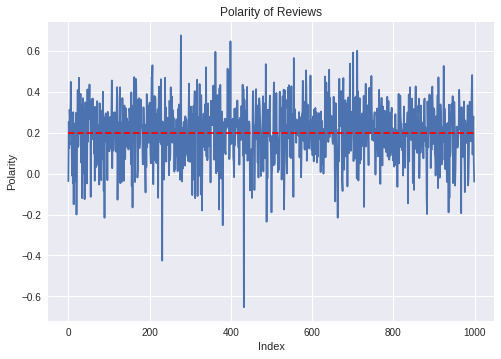

In [ ]:
#Now we can graph the polarity to look for underlying trends
import matplotlib.pyplot as plt

polarities=[]
for blob in text_blobs:
  polarities.append(blob.sentiment.polarity)

polarities = np.asarray(polarities)
polarities_mean = [polarities.mean()]*len(polarities)

plt.plot(polarities)
plt.plot(range(len(polarities)),polarities_mean, linestyle='--', color = 'r')
plt.xlabel("Index")
plt.ylabel("Polarity")
plt.title("Polarity of Reviews")
plt.show()

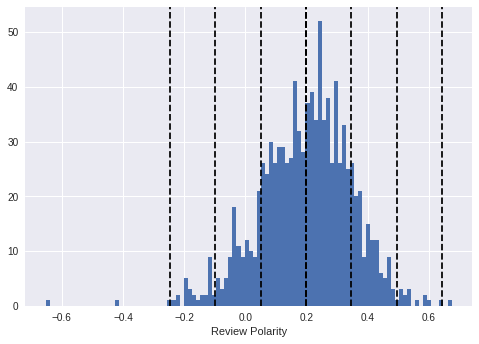

In [ ]:
sigma = polarities.std()
mu = polarities_mean[0]
std_lines = [mu]
for i in range(4):
  std_lines.append(mu - sigma*i)
  std_lines.append(mu + sigma*i)

plt.hist(polarities, bins=100)
plt.xlabel('Review Polarity')
for value in std_lines:
  plt.axvline(value, color = 'k', linestyle = '--')
plt.show()